# Лабораторная работа №7
### Тылецкого Павла

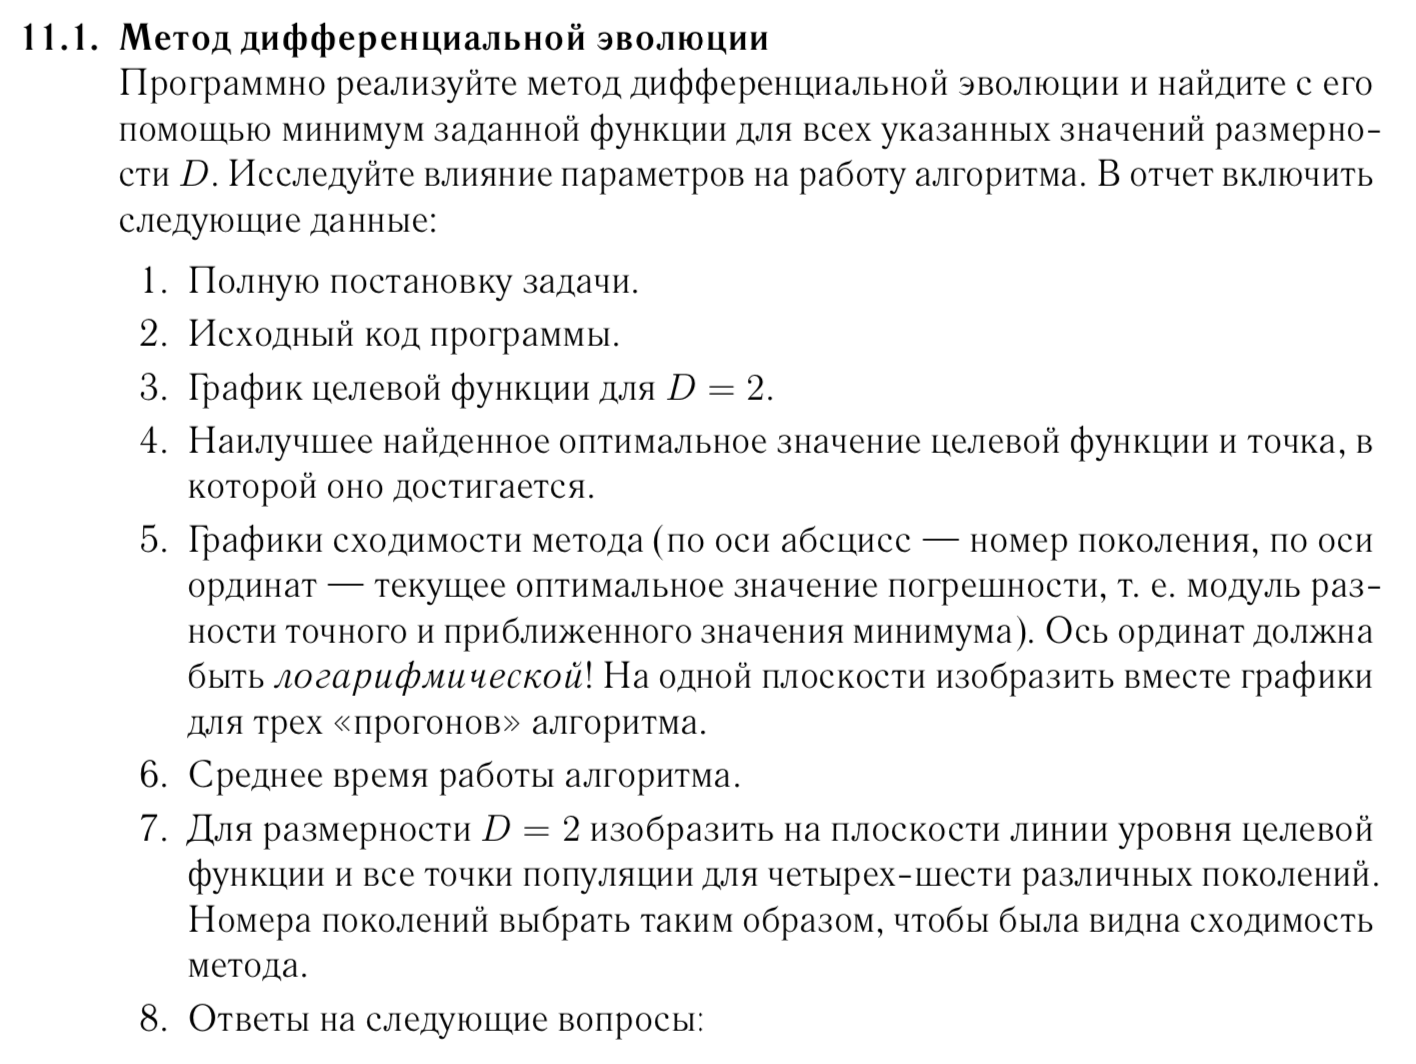
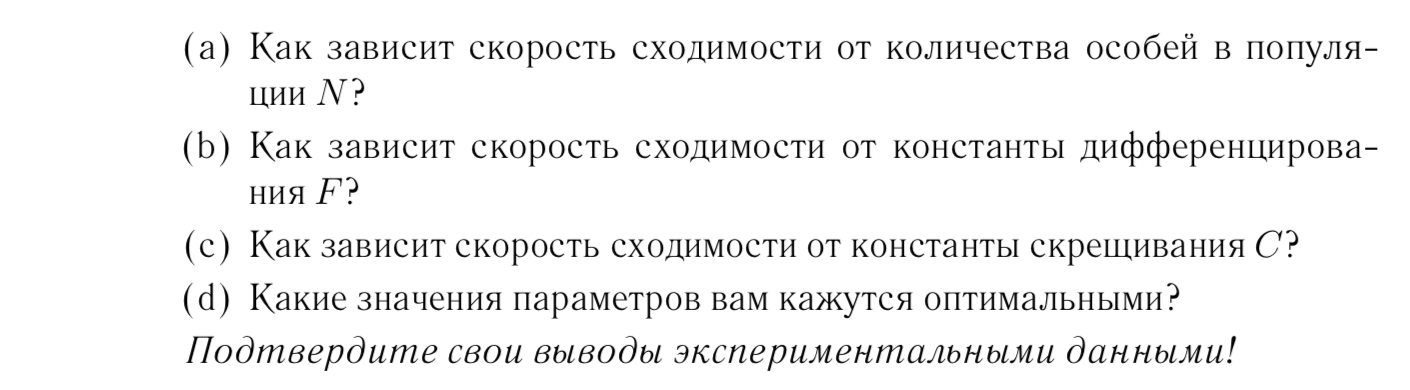

In [25]:
import numpy as np
import random
from tqdm import tqdm
from copy import deepcopy
from matplotlib import pyplot as plt
import time

In [3]:
ACKLEYS_BOUND = 32.768

def ackleys_loss(x, D):
    return -20 * np.exp(-0.2 * np.sqrt(sum(e**2 for e in x) / D)) - np.exp(sum(np.cos(2 * np.pi * e) for e in x) / D) + 20 + np.e

In [7]:
def generate_population(n, f):
    return [np.random.normal(size=f) for _ in range(n)]

def mutant(n, F):
    a, b, c = random.sample(n, 3)
    return c + F * (b - a)

def crossover(x, w, C):
    for i in range(len(x)):
        if random.uniform(0, 1) < C:
            w[i] = x[i]
    return w

def optimize(N, D, F, C, n_iterations, eps=1e-5):
    X = generate_population(N(D), D)
    losses = []
    min_loss = np.inf
    X_min = None
    gen_points = [deepcopy(X)]
    prev_norm = np.inf
    
    for j in tqdm(range(n_iterations)):
        generation_losses = []
        for i in range(len(X)):
            x = X[i]
            w = crossover(x, mutant(X, F), C)
            for w_i in w:
                if w_i < -ACKLEYS_BOUND or w_i > ACKLEYS_BOUND:
                    w = random.sample(X, 1)[0]
                    break
            w_loss = ackleys_loss(w, D)
            x_loss = ackleys_loss(x, D)
            gen_loss = min(w_loss, x_loss)
            generation_losses.append(gen_loss)
            if w_loss <= x_loss:
                X[i] = w
            if gen_loss < min_loss:
                min_loss = gen_loss
                X_min = X[i]
        gen_points.append(deepcopy(X))
        losses.append(np.mean(generation_losses))
        if np.linalg.norm(X) - np.linalg.norm(X_min) < eps:
            break
    return X_min, losses, gen_points

Построим график целевой функции:
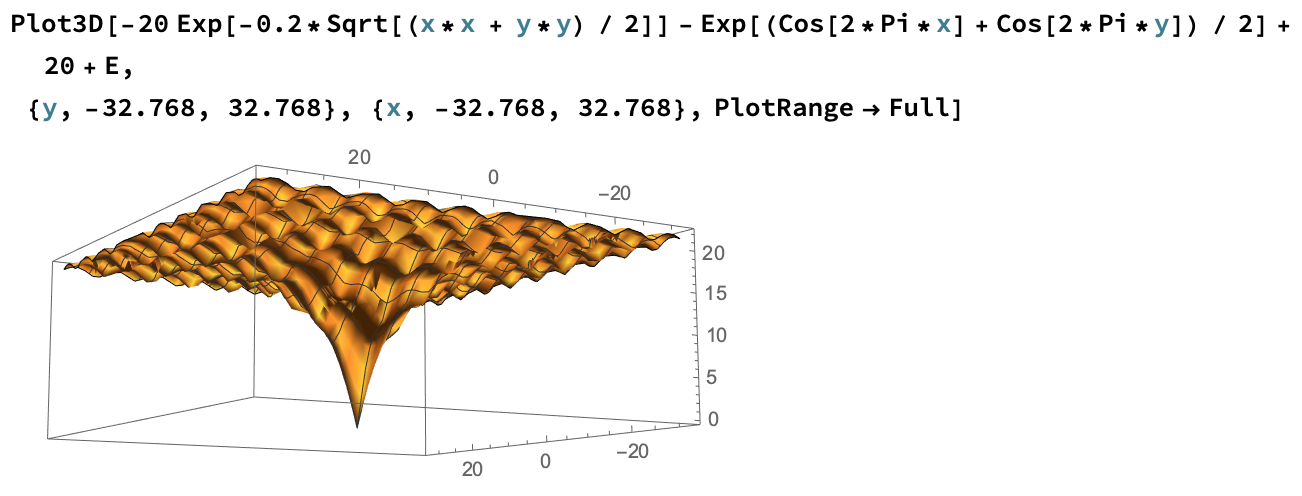

Кажется, что минимум достигается в точке (0;0), а значение = 0. Проверим:
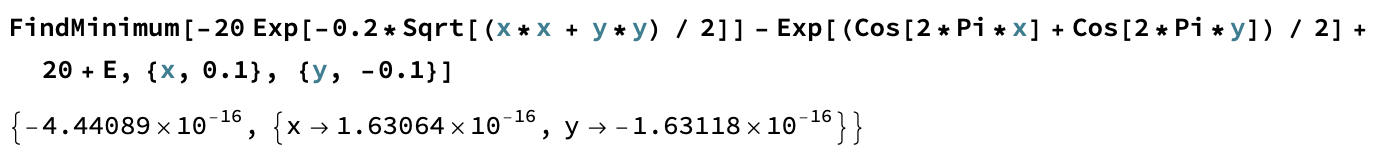

In [5]:
D = [2, 10, 100]
def N(d):
    return 10 * d
F = 0.85
C = 0.5
max_iterations = 1000
eps = 1e-2

In [5]:
for d in D:
    x_min, _, points = optimize(N, d, F, C, max_iterations, eps)
    print(f'Для D={d} минимум функции равен \n\n{ackleys_loss(x_min, d)}\n\n в точке\n\n {x_min}\n\n')
    time.sleep(1)

  0%|          | 0/1000 [00:00<?, ?it/s]


Для D=2 минимум функции равен 

0.0012528711358581468

 в точке

 [-0.00013685 -0.00041936]




 32%|███▏      | 323/1000 [00:04<00:08, 77.88it/s]


Для D=10 минимум функции равен 

0.0008030202766282635

 в точке

 [ 5.73567243e-05 -2.96194353e-04  1.14060602e-04  2.43542771e-05
 -1.47607640e-04  2.51042908e-04 -2.79869452e-04  2.07981088e-04
  1.64788484e-04  2.50425828e-04]




100%|██████████| 1000/1000 [19:12<00:00,  1.15s/it]   


Для D=100 минимум функции равен 

4.560784523958951

 в точке

 [-1.85214101  0.34933532 -1.73960304 -0.50375514  0.90900609 -0.70943664
 -0.69036112  0.78342076 -1.02279559  0.04634502  0.11692939  1.23054234
 -0.19071865 -0.03685441  0.32501353 -0.13365902 -0.34458393  0.44384829
  1.74727714 -0.80288497 -0.27171221 -0.52785396  0.1757367   0.57659422
 -0.51329903  0.03059533 -0.50566408 -0.17070927 -0.53516262 -0.37515593
  0.88982963  0.08187297  1.23680114  1.69112177 -0.43528214 -1.06685853
 -0.6878376  -0.03965259  0.17087896  0.71552504 -0.22413137 -1.22978442
  0.41474187  0.55329165 -0.13525569  0.90100864 -0.53701233 -0.2583468
 -0.67012627 -0.08895945  1.29557212  0.84371724  0.73407764  0.01572273
  0.06605067 -0.43096552 -0.77196482  1.52645235 -0.87064937  0.01639936
  0.9174525   0.22271642 -0.25720867 -0.81736762  1.81558178 -0.28120879
  0.17918045  0.08598505 -0.17763567  1.85178021 -1.15615429  0.11148806
  1.10382379  1.31217795  1.27349962  0.8639702  -0.83937475 

Для размерностей 2 и 10 алгоритмы быстро сошлись на заданную точность, однако при размерности 100 пришлось ограничивать количество итераций, так как скорость сходимости оказалась крайне неприемлимой и по многим координатам алгоритм дает довольно далекие от истины значения.
Здесь и далее время работы алгоритма видно в выводе tqdm (красные блоки)

Построим графики сходимости в зависимости от размерности:

Размерность: 2


  8%|▊         | 42/500 [00:00<00:02, 220.74it/s]


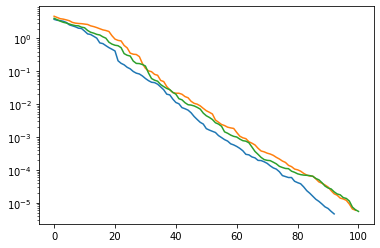

Размерность: 10


100%|██████████| 500/500 [00:05<00:00, 85.16it/s]


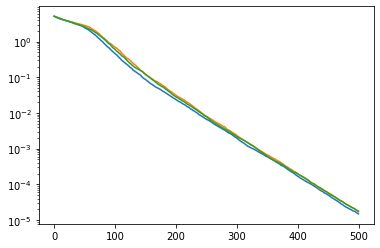

Размерность: 100


100%|██████████| 500/500 [05:40<00:00,  1.47it/s]


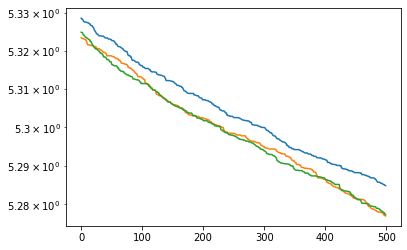

In [17]:
for d in D:
    print(f'Размерность: {d}')
    time.sleep(1)
    x = range(max_iterations)
    x_min, losses, points = optimize(N, d, F, C, 500)
    _, losses2, _ = optimize(N, d, F, C, 500)
    _, losses3, _ = optimize(N, d, F, C, 500)
    plt.plot(x[:len(losses)], losses)
    plt.plot(x[:len(losses2)], losses2)
    plt.plot(x[:len(losses3)], losses3)
    plt.yscale("log")
    plt.show()

  8%|▊         | 76/1000 [00:00<00:01, 524.10it/s]


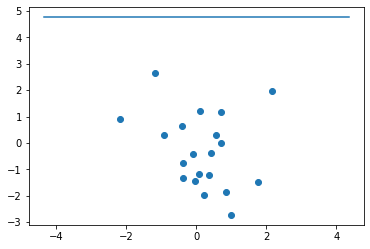

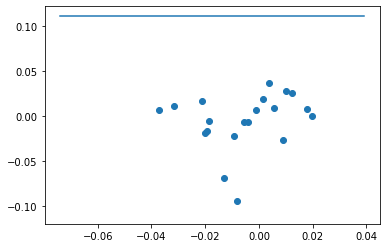

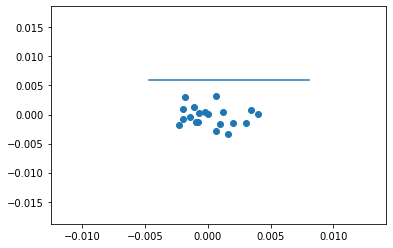

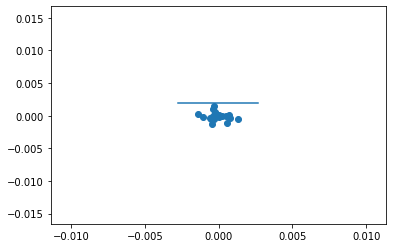

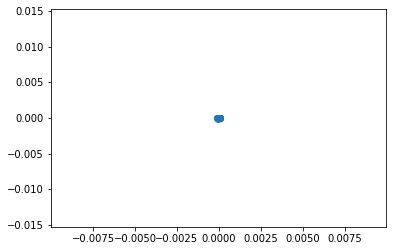

In [20]:
x_min, losses, points = optimize(N, 2, F, C, max_iterations, 1e-5)
for i in [0, 30, 50, 60, 80]:
    ps = np.array(points[i])
    plt.scatter(ps[:,0], ps[:,1])
    plt.plot([min(ps[:,0]) * 2, max(ps[:,0]) * 2], [losses[i]] * 2)
    plt.show()